In [476]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

In [477]:
h=6.626e-34
k=1.360549e-23
c=2.99e8
e=np.exp(1)

In [478]:
def planck(wavelength, temperature):
    a = 2.0 * h * c**2
    b = h*c / (wavelength * k * temperature)
    intensity = a / (wavelength**5 * (np.exp(b) - 1.0))
    return intensity

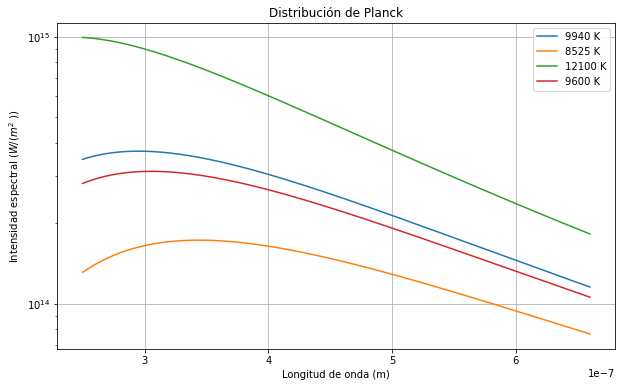

In [489]:
wavelengths = np.linspace(250e-9, 660e-9, 10000)  
T = [9940, 8525, 12100,9600] 
plt.figure(figsize=(10, 6))
for temp in T:
    intensity = planck(wavelengths, temp)
    plt.plot(wavelengths , intensity, label=f'{temp} K')

plt.title('Distribución de Planck')
plt.xlabel('Longitud de onda (m)')
plt.ylabel(r'Intensidad espectral ($W / (m^2$ ))')
plt.yscale("log")
#plt.axvline(x=295e-9,color="blue")
#plt.axvline(x=435e-9,color="blue")
#plt.axvline(x=340e-9,color="red")
#plt.axvline(x=540e-9,color="red")
#plt.axvline(x=460e-9,color="yellow")
#plt.axvline(x=640e-9,color="yellow")
plt.legend()
plt.grid(True)
plt.show()

In [490]:

Filtros=[[365e-9,70e-9],[440e-9,100e-9],[550e-9,90e-9]]

Flujo=[]
for t in T:
    F=[]
    for f in Filtros:
            longitudes=np.linspace(f[0]-f[1],f[0]+f[1],50000)
            Bv = quad(planck, f[0]-f[1],f[0]+f[1], args=(t))
            F.append(Bv[0]*np.pi)
    Flujo.append(F)


Text(0, 0.5, 'Flujo (W/m)')

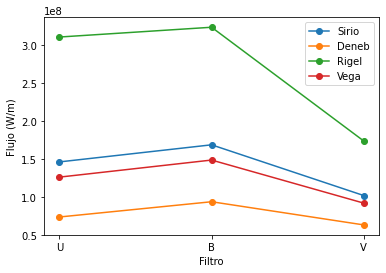

In [491]:
FiltrosNombre=["U","B","V"]
Estrellas=["Sirio","Deneb","Rigel","Vega"]
e=0
for i in Flujo:
    plt.plot(FiltrosNombre,i, marker='o',label=Estrellas[e])
    e=e+1
plt.legend()
plt.xlabel("Filtro")
plt.ylabel("Flujo (W/m)")

In [465]:
Flujos=Flujo[:3]
Ref=Flujo[3]

In [466]:

Flujos

[[145983766.64243826, 168519956.20449454, 101658482.82824285],
 [73391033.48648147, 93491618.63549367, 62950715.35842139],
 [310565416.71360517, 323466966.8358011, 173529891.85790446]]

In [467]:
Ref

[125939040.79210596, 148439947.1192607, 91668901.64712736]

In [468]:
Magnitud_Vega=[0,0,0]

In [469]:
np.log10(1)

0.0

In [492]:
m_aparante_Stars=[]
for i in Flujos:
    FLStar=[]
    fil=0
    while(fil<3):
        FLStar.append(Magnitud_Vega[fil]-2.5*np.log10(i[fil]/Ref[fil]))
        fil=fil+1
    m_aparante_Stars.append(FLStar)

In [493]:
m_aparante_Stars

[[-0.1603604595892202, -0.1377513665667986, -0.11230399034582808],
 [0.5862934443910841, 0.501945280264746, 0.4080533951920359],
 [-0.9799817791025356, -0.8456978629775764, -0.6928806708903495]]

Text(0, 0.5, 'Magnitud aparente (mag)')

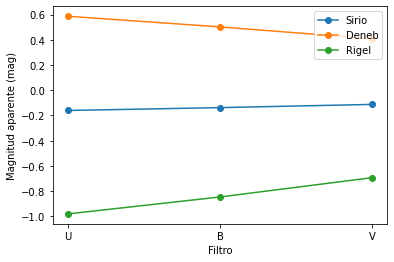

In [494]:
FiltrosNombre=["U","B","V"]
Estrellas=["Sirio","Deneb","Rigel","Vega"]
e=0
for i in m_aparante_Stars:
    plt.plot(FiltrosNombre,i, marker='o',label=Estrellas[e])
    e=e+1
plt.legend()
plt.xlabel("Filtro")
plt.ylabel("Magnitud aparente (mag)")

In [472]:
distancias=[2.64,1438.6,271.1]
Magnitud_Absoluta=[]
jn=0
for i in m_aparante_Stars:
    i=np.array(i)
    Magnitud_Absoluta.append((-5*np.log10(distancias[jn])+5+i))
    jn=jn+1

In [473]:
Magnitud_Absoluta

[array([2.73161991, 2.754229  , 2.77967638]),
 array([-10.20340684, -10.287755  , -10.38164688]),
 array([-8.14562937, -8.01134545, -7.85852826])]

In [474]:
for i,k in enumerate(Estrellas[:-1]):
    for iF,kF in enumerate(FiltrosNombre):
        print("La magnitud de "+ str(k)+" con una temperatura superficial de " +str(T[i])+", en el filtro "+str(kF)+" es de : " +str(Magnitud_Absoluta[i][iF])) 

La magnitud de Sirio con una temperatura superficial de 9940, en el filtro U es de : 2.7316199060616246
La magnitud de Sirio con una temperatura superficial de 9940, en el filtro B es de : 2.7542289990840465
La magnitud de Sirio con una temperatura superficial de 9940, en el filtro V es de : 2.7796763753050167
La magnitud de Deneb con una temperatura superficial de 8525, en el filtro U es de : -10.203406835432753
La magnitud de Deneb con una temperatura superficial de 8525, en el filtro B es de : -10.287754999559091
La magnitud de Deneb con una temperatura superficial de 8525, en el filtro V es de : -10.3816468846318
La magnitud de Rigel con una temperatura superficial de 12100, en el filtro U es de : -8.145629367004965
La magnitud de Rigel con una temperatura superficial de 12100, en el filtro B es de : -8.011345450880006
La magnitud de Rigel con una temperatura superficial de 12100, en el filtro V es de : -7.858528258792778


Text(0, 0.5, 'Magnitud Absoluta (mag)')

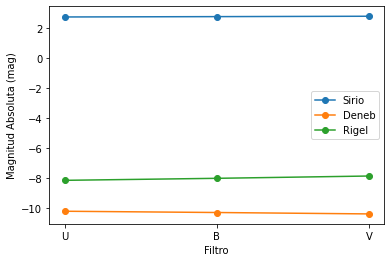

In [495]:
FiltrosNombre=["U","B","V"]
Estrellas=["Sirio","Deneb","Rigel","Vega"]
e=0
for i in Magnitud_Absoluta:
    plt.plot(FiltrosNombre,i, marker='o',label=Estrellas[e])
    e=e+1
plt.legend()
plt.xlabel("Filtro")
plt.ylabel("Magnitud Absoluta (mag)")